# Homework_2

# Part 1: Digit recognition using CNNs
You are asked to train a feed forward network to recognize handwritten digits. Use the MNIST data commonly available on the internet.

1.Read your data.
2.Construct a CNN-based network that best fits the data with good generalization on the test data.
3.Report the training and test performances of your trained final model.

You may want to start with the previous homework for this. Do not use one of the existing networks. The complexity of the model should be a bit higher than AlexNet.

# 1. Importing Libraries and the Dataset

In [33]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt  

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,  Input
from keras import backend as K
%matplotlib inline


In [35]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.14.0


In [6]:
(X_train, y_train) , (X_test, y_test) =mnist.load_data()      # Loading data

In [7]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [8]:
print(X_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [9]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [10]:
# Checking the shape of one image
X_train[68].shape

(28, 28)

In [11]:
X_train[169]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  42, 235, 255,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        132, 208, 253, 253, 171, 108,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

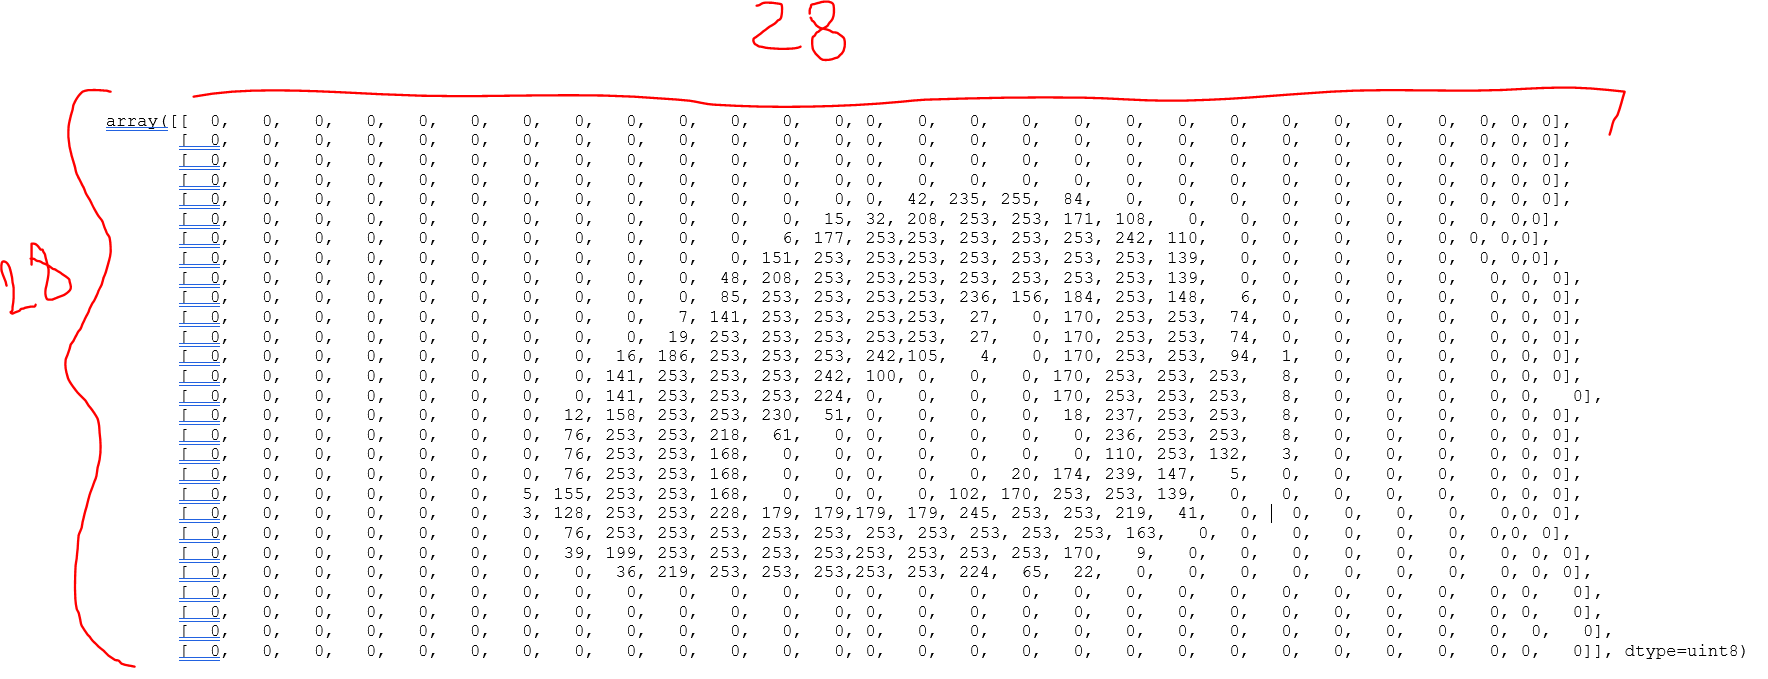

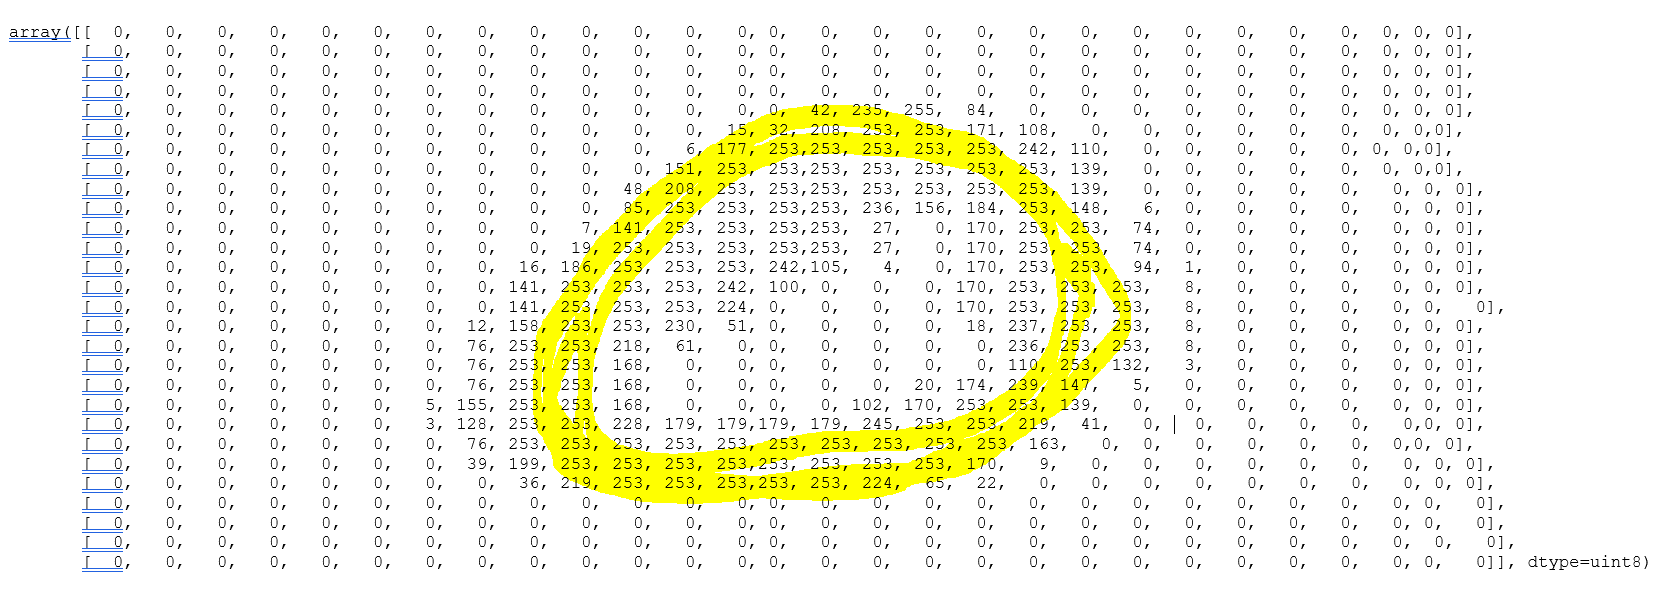

In [12]:
import matplotlib.pyplot as plt

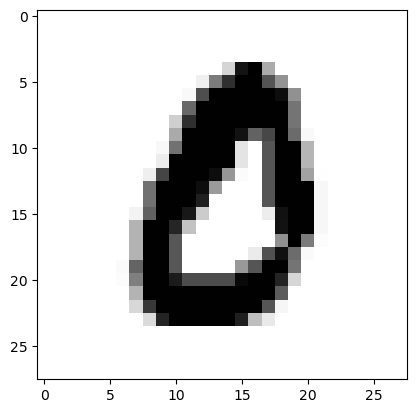

In [13]:
plt.imshow(X_train[169], cmap= plt.cm.binary)

cmap= plt.cm.binary parametresi, siyah beyaz bir görüntü elde etmek için kullanılan bir renk haritası (color map) belirtir.

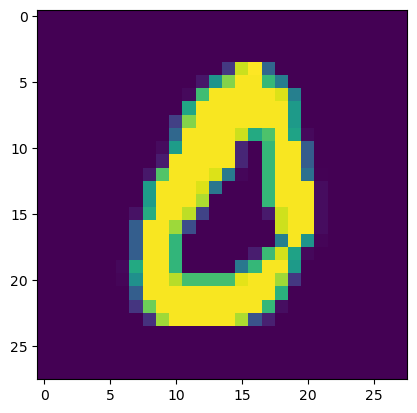

In [15]:
plt.imshow(X_train[169])

In [17]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

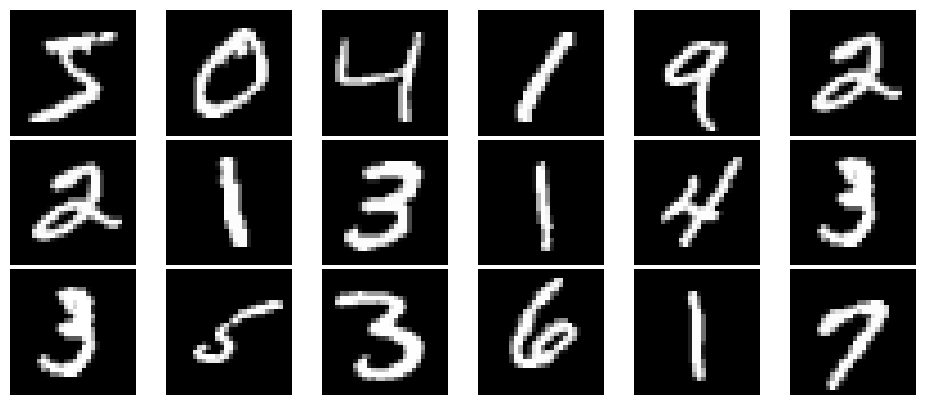

In [18]:
num_rows, num_cols = 3, 6       # Datadan 3 tane row, 6 tane column sectik.
f, ax = plt.subplots(3, 6, figsize=(12,5),
                     gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].imshow( X_train[image_index], cmap='gray')
plt.show()
plt.close()

C:\Users\bulen\AppData\Local\Temp\ipykernel_17912\3924017328.py:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


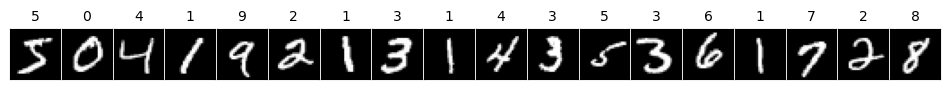

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=18, figsize=(12,5),
                         gridspec_kw={'wspace':0.04, 'hspace':0.03}, 
                         squeeze=True)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_xticks([]), ax.set_yticks([])
    ax.set_title(str(y_train[i]), fontsize=10)
    
plt.tight_layout()
plt.show()

# Data Preprocessing

In [20]:
X_train[9].min()

0

In [21]:
X_train[9].max()

255

In [22]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [23]:
X_train[17]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [84]:
X_train[17].min()

0.0

In [24]:
X_train[17].max()

1.0

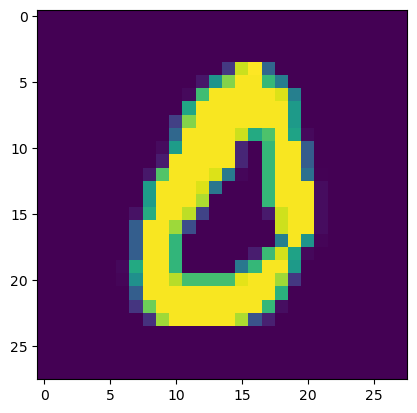

In [26]:
plt.imshow(X_train[169])

In [27]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [28]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Eğer X_train, 28x28 boyutunda tek bir matris (shape=(60000, 28, 28)) olsaydı, onu bir CNN modeline sokmak mümkün olmazdı çünkü CNN modelleri 4 boyutlu bir veri yapısı beklerler. Bu nedenle, reshape işlemi yapılarak X_train, 4 boyutlu bir veri yapısı olan (60000, 28, 28, 1) şekline dönüştürülmüştür.

In [29]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [30]:
X_train[777].shape

(28, 28, 1)

In [31]:
from tensorflow.keras.utils import to_categorical

ModuleNotFoundError: No module named 'tensorflow.keras'

In [92]:
y_train[115]

4

In [93]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [94]:
Y_train[115]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [95]:
Y_train[715]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

Bu, sinir ağında kullanılacak verinin 2 boyutlu olduğunu gösterir. Bu durumda, veri 28x28 piksel boyutlarında olduğu için 2D olarak ifade edilir. 3D ifade, örneğin video gibi 3 boyutlu veri türleri için kullanılır.

# Build Model

In [97]:
model = Sequential() 

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(28, 28, 1), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               692352    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [99]:
from tensorflow.keras.callbacks import EarlyStopping

In [100]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

60.000/32

In [101]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, validation_data=(X_test,Y_test),callbacks=[early_stop])


Epoch 1/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1556 - accuracy: 0.9536 - val_loss: 0.0608 - val_accuracy: 0.9823
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0517 - accuracy: 0.9837 - val_loss: 0.0726 - val_accuracy: 0.9766
Epoch 3/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0329 - accuracy: 0.9898 - val_loss: 0.0451 - val_accuracy: 0.9847
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0223 - accuracy: 0.9930 - val_loss: 0.0421 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0462 - val_accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0111 - accuracy: 0.9965 - val_loss: 0.0456 - val_accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0429 -

Batch size belirtilmediğinde varsayılan olarak 32 kullanılır. Bu nedenle batch_size=32 yerine batch_size=None yazılsa bile sonuçta aynı batch size kullanılacaktır. Ancak, bu belirsizliğe neden olduğundan, batch size'ı belirtilmesi önerilir.

#  Model Evaluation

In [102]:
model.metrics_names  # Modelde kullanilan metrikler

['loss', 'accuracy']

In [103]:
model.history.history   # Modelin egitimdeki loss ve accuracy history' si 

{'loss': [0.15556642413139343,
  0.0517125129699707,
  0.0329117476940155,
  0.02230311557650566,
  0.014272797852754593,
  0.011093242093920708,
  0.008152748458087444],
 'accuracy': [0.9536333084106445,
  0.9836666584014893,
  0.9897666573524475,
  0.9930333495140076,
  0.9954833388328552,
  0.9964500069618225,
  0.9973166584968567],
 'val_loss': [0.06082282215356827,
  0.07257451862096786,
  0.045067571103572845,
  0.04210464656352997,
  0.04621867835521698,
  0.04559541121125221,
  0.04290227219462395],
 'val_accuracy': [0.9822999835014343,
  0.9765999913215637,
  0.9847000241279602,
  0.9869999885559082,
  0.986299991607666,
  0.9865999817848206,
  0.9879000186920166]}

In [104]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.155566,0.953633,0.060823,0.9823
1,0.051713,0.983667,0.072575,0.9766
2,0.032912,0.989767,0.045068,0.9847
3,0.022303,0.993033,0.042105,0.9870
4,0.014273,0.995483,0.046219,0.9863


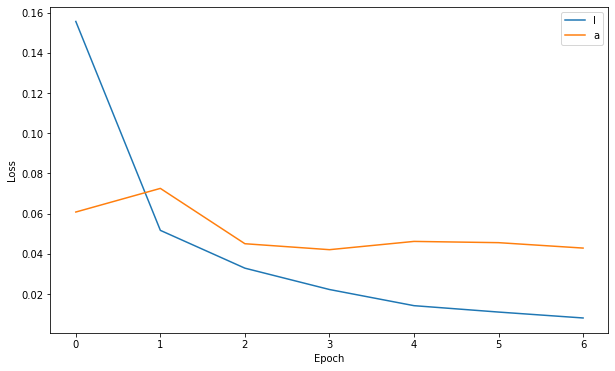

In [105]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss)              # DataFrame' den cekilen loss degerleri
plt.plot(summary.val_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend('labels');

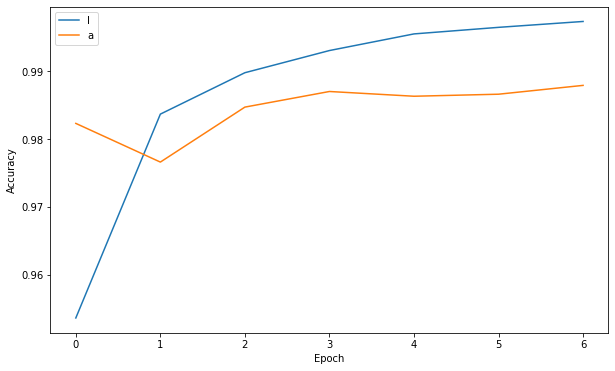

In [106]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy)        # DataFrame' den cekilen accuracy degerleri
plt.plot(summary.val_accuracy)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend('labels');

In [107]:
print(model.evaluate(X_test,Y_test,verbose=1))

313/313 [==============================] - 3s 10ms/step - loss: 0.0429 - accuracy: 0.9879
[0.04290227219462395, 0.9879000186920166]


model.evaluate() fonksiyonu, modelin test setindeki performansını hesaplar. Bu fonksiyona test seti verileri (X_test) ve gerçek etiketleri (Y_test) parametre olarak verilir. Fonksiyon, iki değer döndürür: test seti üzerindeki kayıp (loss) ve doğruluk (accuracy) oranı.

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
preds = model.predict(X_test)
preds

array([[2.0646499e-12, 3.8298874e-11, 7.8609252e-10, ..., 9.9999881e-01,
        3.4781727e-10, 3.8879411e-09],
       [4.8069734e-12, 3.2581264e-07, 9.9999964e-01, ..., 9.1960402e-14,
        6.1950591e-13, 9.3485481e-16],
       [6.3562364e-09, 9.9999952e-01, 2.4854094e-09, ..., 3.9586364e-08,
        1.0391175e-07, 3.2927402e-12],
       ...,
       [1.9844860e-15, 2.9382781e-11, 2.7119355e-13, ..., 6.4030994e-09,
        1.3047083e-08, 1.5578894e-09],
       [2.8004934e-13, 1.1355143e-13, 2.5099233e-14, ..., 7.3313307e-11,
        4.7489390e-04, 2.3357720e-12],
       [2.6062093e-12, 1.0173260e-15, 1.7414526e-12, ..., 6.8424025e-20,
        6.4191016e-14, 2.5954330e-17]], dtype=float32)

preds değişkeni, modelimiz tarafından tahmin edilen test veri setindeki her bir görüntünün sınıf tahminlerini içeren bir numpy dizisidir. Yani, her bir test görüntüsü için, modelimiz tarafından öngörülen sınıfın olasılıklarını gösterir.

In [110]:
preds[0]

array([2.0646499e-12, 3.8298874e-11, 7.8609252e-10, 1.1466124e-06,
       2.8621322e-13, 2.3850433e-12, 2.1535427e-17, 9.9999881e-01,
       3.4781727e-10, 3.8879411e-09], dtype=float32)

9.9999964e-01: Sekizinci sınıfın tahmini olasılık değeri. Bu değer çok yüksektir, bu nedenle model bu sınıfı büyük bir olasılıkla tahmin ediyor.

"9.9999964e-01" ifadesindeki "e" veya "E" harfi, bilimsel gösterimde üs (exponent) işaretini temsil eder. Bu gösterimde bir sayının büyüklüğünü daha kompakt bir şekilde ifade etmek için kullanılır.

Yani, "9.9999964e-01" ifadesi aslında "0.99999964" değerini ifade eder. Bu, yaklaşık olarak 1'e çok yakın bir değerdir. Bu nedenle, bu değer neredeyse tam olarak 1'dir.

In [111]:
preds[1]

array([4.8069734e-12, 3.2581264e-07, 9.9999964e-01, 3.8398600e-11,
       2.1222932e-17, 5.5912420e-17, 2.5412547e-13, 9.1960402e-14,
       6.1950591e-13, 9.3485481e-16], dtype=float32)

In [112]:
predictions= np.argmax(preds, axis=1)


predictions adlı değişkene, preds adlı numpy dizisindeki en yüksek olasılığa sahip sınıfın indeksleri atanıyor. axis=1 parametresi, argmax işleminin sütunlara göre (yani her örnekteki sınıf olasılıklarının karşılaştırılması) yapılacağını belirtir. Sonuç olarak, predictions dizisi, preds dizisindeki her örnek için en yüksek olasılığa sahip sınıfın indekslerini içerir.

In [113]:
len(predictions)

10000

In [114]:
predictions

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [115]:
print(predictions[:300])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 5 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8
 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 4 6 7 3 1 7 1 8 2
 0 2 9 9 5 5 1 5 6 0 3 4 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 7 1 8 1 8 1 8 5 0 8
 9 2 5 0 1 1 1 0 9 0 3 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2
 2 7 1 2 8 4 1 7 3 3 8 8 7 9 2 2 4 1 5 9 8 7 2 3 0 4 4 2 4 1 9 5 7 7 2 8 2
 6 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 7 5 9 2 6 4 1 5 8 2 9 2 0 4
 0 0 2 8]


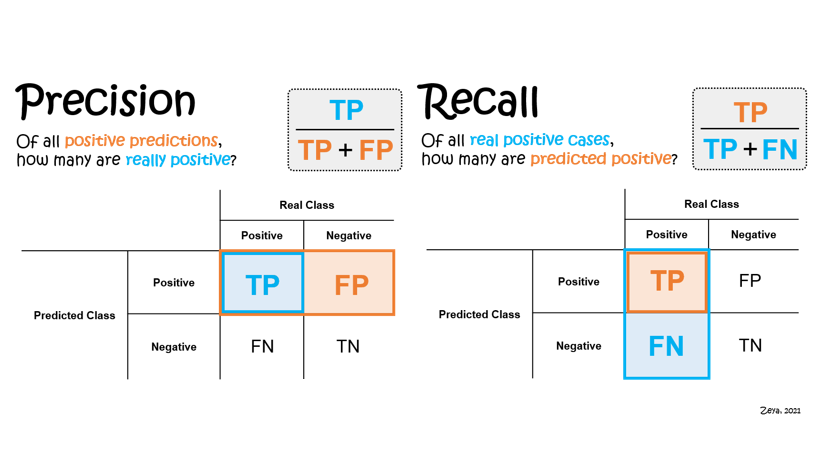

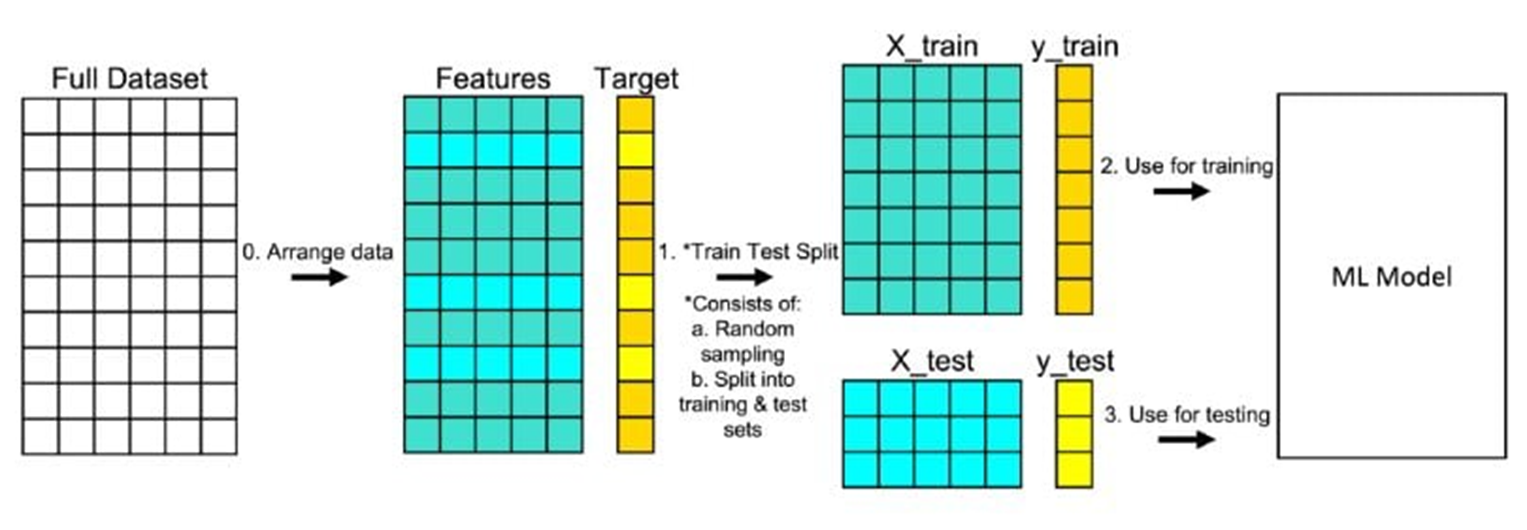

In [116]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.98      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [117]:
print(confusion_matrix(y_test, predictions))

[[ 975    1    0    1    0    0    3    0    0    0]
 [   0 1133    0    0    0    0    1    0    1    0]
 [   1    6 1017    2    1    0    0    4    1    0]
 [   0    1    0 1002    0    5    0    0    2    0]
 [   0    0    0    0  980    0    0    0    2    0]
 [   1    0    0    9    0  876    5    0    1    0]
 [   6    2    0    0    1    0  949    0    0    0]
 [   1    3    7    0    0    0    0 1016    1    0]
 [   3    0    1    3    1    3    2    1  956    4]
 [   0    2    0    8    9    4    0    8    3  975]]


In [118]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04290227219462395
Test accuracy: 0.9879000186920166


In [119]:
my_number = X_test[120]

In [120]:
my_number.shape

(28, 28, 1)

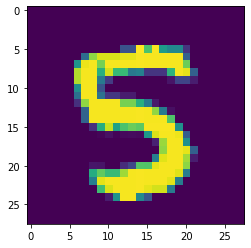

In [121]:
plt.imshow(my_number); 

In [122]:
model.predict(my_number.reshape(1,28,28,1))

array([[5.0685599e-16, 1.9143800e-15, 2.6045662e-16, 1.8431633e-08,
        1.8886488e-18, 9.9999893e-01, 4.6059056e-14, 2.2929616e-15,
        8.8020861e-11, 1.0446100e-06]], dtype=float32)